In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
%matplotlib inline
import seaborn as sns
import copy
import altair as alt

from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import LinearSVR, LinearSVC

from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings("ignore")

# Table of Contents
1. [Introduction](#introduction)
2. [Exploratory Data Analaysis](#paragraph1)
    1. [Data Inspection](#subparagraph1.1)
    2. [Data Visualization & Cleaning](#subparagraph1.2)
3. [Regression Models](#paragraph2)
4. [Classification Models](#paragraph3)
5. [Discussion & Conclusion](#paragraph4)
6. [References](#references)

## 1. Introduction <a name="introduction"></a>

GitHub link: https://github.com/machristensen1/student-perf-uci-ml

In this project, we'll be taking a look at what factors seem to have the most influence on the performance of student grades. We'll try to see if we are able to create a model that can successfully predict a student's final grade without considering their previous grades from their school year. We'll be comparing the performance of various supervised classification and regression models, including SVM, Random Forest, Logistic, and Linear Regression models. From https://archive.ics.uci.edu/dataset/320/student+performance:

> This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).

|    | Attributes | Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:                      |
|----|------------|-----------------------------------------------------------------------------------------------------------------------------------|
| 1  | school     | student's school (binary: GP Gabriel Pereira or MS Mousinho da Silveira)                                                          |
| 2  | sex        | student's sex (binary: F female or M male)                                                                                        |
| 3  | age        | student's age (numeric: from 15 to 22)                                                                                            |
| 4  | address    | student's home address type (binary: U urban or R rural)                                                                          |
| 5  | famsize    | family size (binary: LE3 less or equal to 3 or GT3 greater than 3)                                                                |
| 6  | Pstatus    | parent's cohabitation status (binary: T living together or A apart)                                                               |
| 7  | Medu       | mother's education (numeric: 0 none, 1 primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher |
| 8  | Fedu       | father's education (numeric: 0 none, 1 primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher |
| 9  | Mjob       | mother's job (nominal: teacher, health care related, civil services (e.g. administrative or police), at_home or other)            |
| 10 | Fjob       | father's job (nominal: teacher, health care related, civil services (e.g. administrative or police), at_home or other)            |
| 11 | reason     | reason to choose this school (nominal: close to home, school reputation, course preference or other)                              |
| 12 | guardian   | student's guardian (nominal: mother, father or other)                                                                             |
| 13 | traveltime | home to school travel time (numeric: 1 <15 min., 2 15 to 30 min., 3 30 min. to 1 hour, or 4 >1 hour)                              |
| 14 | studytime  | weekly study time (numeric: 1 <2 hours, 2 2 to 5 hours, 3 5 to 10 hours, or 4 >10 hours)                                          |
| 15 | failures   | number of past class failures (numeric: n if 1<=n<3, else 4)                                                                      |
| 16 | schoolsup  | extra educational support (binary: yes or no)                                                                                     |
| 17 | famsup     | family educational support (binary: yes or no)                                                                                    |
| 18 | paid       | extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)                                             |
| 19 | activities | extra curricular activities (binary: yes or no)                                                                                   |
| 20 | nursery    | attended nursery school (binary: yes or no)                                                                                       |
| 21 | higher     | wants to take higher education (binary: yes or no)                                                                                |
| 22 | internet   | Internet access at home (binary: yes or no)                                                                                       |
| 23 | romantic   | with a romantic relationship (binary: yes or no)                                                                                  |
| 24 | famrel     | quality of family relationships (numeric: from 1 very bad to 5 excellent)                                                         |
| 25 | freetime   | free time after school (numeric: from 1 very low to 5 very high)                                                                  |
| 26 | goout      | going out with friends (numeric: from 1 very low to 5 very high)                                                                  |
| 27 | Dalc       | workday alcohol consumption (numeric: from 1 very low to 5 very high)                                                             |
| 28 | Walc       | weekend alcohol consumption (numeric: from 1 very low to 5 very high)                                                             |
| 29 | health     | current health status (numeric: from 1 very bad to 5 very good)                                                                   |
| 30 | absences   | number of school absences (numeric: from 0 to 93)                                                                                 |
|    |            | these grades are related with the course subject, Math or Portuguese:                                                             |
| 31 | G1         | first period grade (numeric: from 0 to 20)                                                                                        |
| 32 | G2         | second period grade (numeric: from 0 to 20)                                                                                       |
| 33 | G3         | final grade (numeric: from 0 to 20, output target)                                                                                |
|    |            |                                                                                                                                   |

Additional note: there are several (382) students that belong to both datasets . These students can be identified by searching for identical attributes that characterize each student, as shown in the annexed R file.

## 2. Exploratory Data Analysis <a name="paragraph1"></a>

In [2]:
math = pd.read_csv("student-mat.csv", sep = ";")
port = pd.read_csv("student-por.csv", sep = ";")

### 2.A. Data Inspection <a name="subparagraph1.1"></a>



In [3]:
math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [4]:
math.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [5]:
math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
port.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


We are mainly looking for the final grade `G3` so we'll drop the other two grades. We'll also convert the grades to a pass/fail score so we can compare how well regression methods perform against classification methods.

In [7]:
math.rename(columns={'G3':'Grade'}, inplace=True)
port.rename(columns={'G3':'Grade'}, inplace=True)

math = math.drop(['G1', 'G2'], axis = 1)
port = port.drop(['G1', 'G2'], axis = 1)

#Pass/Fail metric 
math['Pass'] = np.where(math["Grade"] >= 10, 1, 0)
port['Pass'] = np.where(port["Grade"] >= 10, 1, 0)

### 2.B. Data Visualization & Cleaning<a name="subparagraph1.2"></a>
Let's take a look at some histograms and boxplots to see if we need further data cleaning. 

On inspection, we notice that the data is bimodal due to the large amount of failures, which we will have to take care off. We also notice that `age` and `absences` have outliers. Since these appear to be fairly right skewed, we'll cull any outliers exceeding $1.5(IQR) + Q3$. We will be culling entries where `age > 21`, `absences > 20` for math and `absences > 15` for Portugese. For `P_grade`, we'll also omit any outliers where $Q1 - 1.5(IQR)$, i.e. `P_grade < 4`.

<Axes: xlabel='Grade', ylabel='Count'>

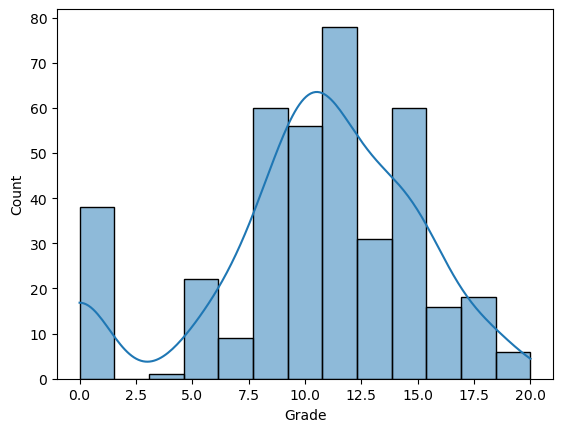

In [8]:
sns.histplot(math['Grade'], kde=True)

<Axes: xlabel='Grade', ylabel='Count'>

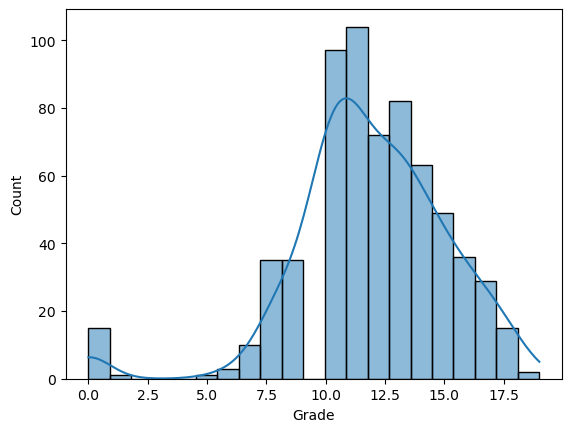

In [9]:
sns.histplot(port['Grade'], kde=True)

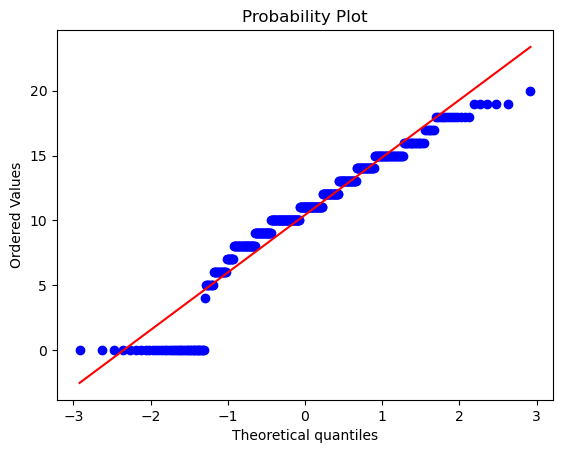

In [10]:
res = stats.probplot(math['Grade'], plot=plt)

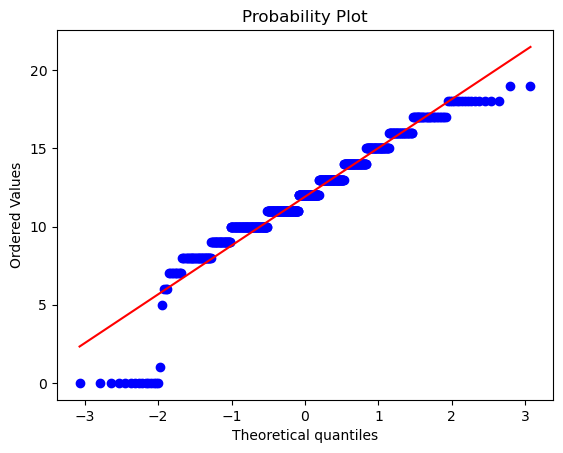

In [11]:
res = stats.probplot(port['Grade'], plot=plt)

In [12]:
demo_cats = ["school", "sex", "age", "address", "guardian"]


base_math_demo = alt.Chart(math)
bind_d = demo_cats
drp_d = alt.binding_select(options = bind_d, 
                             name = "Select:")
sel_d = alt.selection_single(fields = ['column'], 
                               value = [{'column': demo_cats[0]}], 
                               bind = drp_d)

math_demo_bar = base_math_demo.properties(width = 250, height = 250).transform_fold(
    demo_cats,as_=['column', 'value']
).add_selection(
    sel_d
).transform_filter(
    sel_d
).mark_bar().encode(
    y = alt.Y("mean(Grade)", scale=alt.Scale(domain=[0, 15])).title("Mean Math Grade"),
    x = alt.X(field = "value", type='nominal', sort=alt.EncodingSortField(field='Grade', op='mean')).title("Math"),
    tooltip = ["value:N", "mean(Grade)", "count()"]
)

base_port_demo = alt.Chart(port)

port_demo_bar = base_port_demo.properties(width = 250, height = 250).transform_fold(
    demo_cats,as_=['column', 'value']
).add_selection(
    sel_d
).transform_filter(
    sel_d
).mark_bar().encode(
    y = alt.Y("mean(Grade)", scale=alt.Scale(domain=[0, 15])).title("Mean Math Grade"),
    x = alt.X(field = "value", type='nominal', sort=alt.EncodingSortField(field='Grade', op='mean')).title("Portugese"),
    tooltip = ["value:N", "mean(Grade)", "count()"]
)

math_demo_bar | port_demo_bar

alt.HConcatChart(...)

In [13]:
math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,Grade,Pass
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.415190,0.670886
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,4.581443,0.470487
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,1.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,14.000000,1.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,20.000000,1.000000


In [14]:
#port.describe()

[Text(1, 0, 'Age (Math)'), Text(2, 0, 'Age (Port)')]

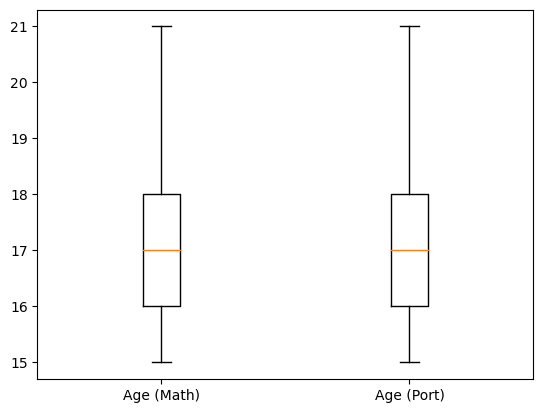

In [50]:
ageoutliers = {'Age (Math)': math['age'], 'Age (Port)': port['age']}
fig, ax = plt.subplots()

ax.boxplot(ageoutliers.values())
ax.set_xticklabels(ageoutliers.keys())

[Text(1, 0, 'Absences (Math)'), Text(2, 0, 'Absences (Port)')]

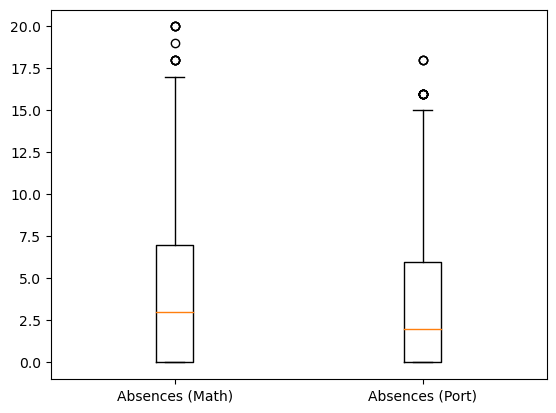

In [51]:
absnoutliers = {'Absences (Math)': math['absences'], 'Absences (Port)': port['absences']}
fig, ax = plt.subplots()

ax.boxplot(absnoutliers.values())
ax.set_xticklabels(absnoutliers.keys())

[Text(1, 0, 'Grade (Math)'), Text(2, 0, 'Grade (Port)')]

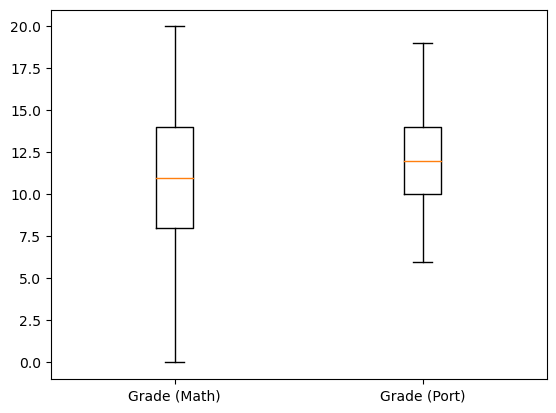

In [52]:
gradeoutliers = {'Grade (Math)': math['Grade'], 'Grade (Port)': port['Grade']}
fig, ax = plt.subplots()

ax.boxplot(gradeoutliers.values())
ax.set_xticklabels(gradeoutliers.keys())

In [18]:
math = math[math['age']<=21]
port = port[port['age']<=21]

math = math[math['absences']<=20]
port = port[port['absences']<=18]

#math = math[math['Grade'] != 0]
port = port[port['Grade'] >= 4]

In [19]:
#for col in port.columns:
#    print(col, port[col].unique())

In [20]:
math = math.replace(to_replace=['no', 'yes'], value=[False, True])
port = port.replace(to_replace=['no', 'yes'], value=[False, True])

categorical_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus'] 
math = pd.get_dummies(math, columns = categorical_cols, drop_first = True)
port = pd.get_dummies(port, columns = categorical_cols, drop_first = True)

#for col in math.columns:
#    print(col, math[col].unique())

### Correlation Matrix

<Axes: >

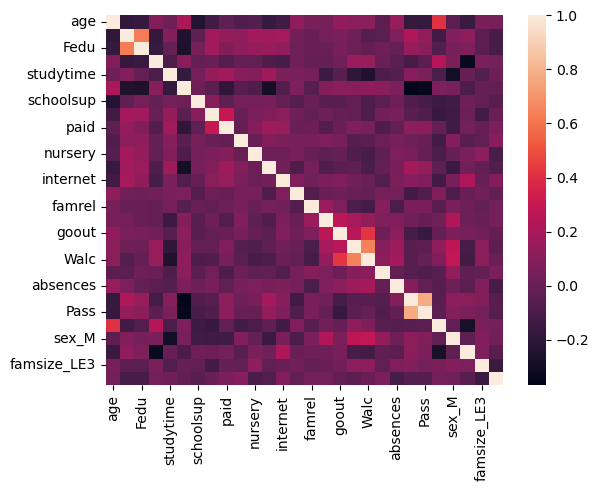

In [21]:
sns.heatmap(math.corr(numeric_only = True))
#sns.heatmap(port.corr(numeric_only = True))

Since we already have a lot of features, we'll try our best to omit columns that are likely to be collinear with each other before performing any rigorous analysis. Since many of the factors are categorical, it is really difficult to deduce collinearity by inspection, so we'll try to address it with intuition and later perform recursive feature elimination to futher cull weakly contributing independent variables. 

* Condense `Medu`, `Pedu` into a average `Pedu` and drop `Mjob`, `FJob`, `guardian`
* Generate weighted average alcohol consumption `Alc = (5 * Dalc + 2 * Walc)/7`
* Choose `studytime` as the predominant time measure and drop `traveltime`, `freetime`, `goout`.
* `Reason` and `higher` are fairly similar explanatory metrics, we can drop one.

In [22]:
math['Pedu'] = math[['Medu','Fedu']].mean(axis = 1).astype(int)
math['Alc'] = round((math['Dalc']*5+math['Walc']*2)/7,0).astype(int)

math = math.drop(['Medu', 'Fedu', 'Mjob', 'Fjob', 'Dalc', 'Walc', 'traveltime', 'freetime', 'goout','reason', 'guardian'], axis = 1)
math.head()

,age,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,...,absences,Grade,Pass,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Pedu,Alc
0,18,2,0,True,False,False,False,True,True,False,...,6,6,0,0,0,1,0,0,4,1
1,17,2,0,False,True,False,False,False,True,True,...,4,6,0,0,0,1,0,1,1,1
2,15,2,3,True,False,True,False,True,True,True,...,10,10,1,0,0,1,1,1,1,2
3,15,3,0,False,True,True,True,True,True,True,...,2,15,1,0,0,1,0,1,3,1
4,16,2,0,False,True,True,False,True,True,False,...,4,10,1,0,0,1,0,1,3,1


<Axes: >

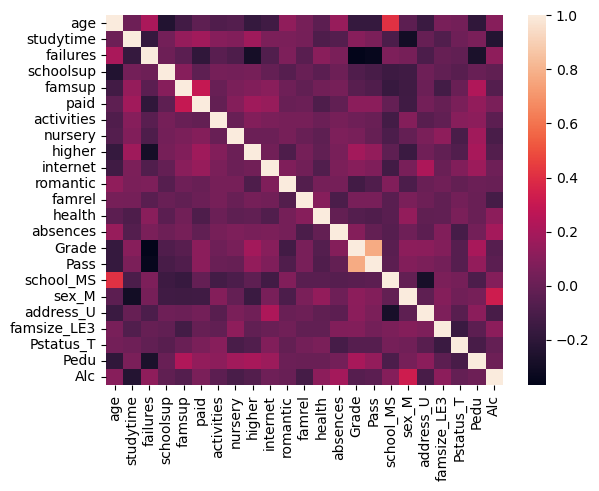

In [23]:
sns.heatmap(math.corr(numeric_only = True))

# 3. Regression Models <a name="paragraph2"></a>

We'll begin by taking a look at various regression models and seeing how well they perform.

In [24]:
X_math = math.drop(["Grade", "Pass"], axis = 1) #Dropping the "Pass" category
y_math = math["Grade"]

#X_port = port.drop(["Grade", "Pass"], axis = 1)
#y_port = port["Grade"]

X_math.head()

,age,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,...,famrel,health,absences,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Pedu,Alc
0,18,2,0,True,False,False,False,True,True,False,...,4,3,6,0,0,1,0,0,4,1
1,17,2,0,False,True,False,False,False,True,True,...,5,3,4,0,0,1,0,1,1,1
2,15,2,3,True,False,True,False,True,True,True,...,4,3,10,0,0,1,1,1,1,2
3,15,3,0,False,True,True,True,True,True,True,...,3,5,2,0,0,1,0,1,3,1
4,16,2,0,False,True,True,False,True,True,False,...,4,5,4,0,0,1,0,1,3,1


In [25]:
#Train-Test-Split
X_math_train, X_math_test, y_math_train, y_math_test = train_test_split(X_math,
                                                                       y_math,
                                                                       test_size = 0.20,
                                                                       random_state = 0)

## Multiple Linear Regression


In [26]:
estimator = LinearRegression()
rfecv = RFECV(estimator=estimator, 
              step = 1,
              cv=10,
             scoring = 'r2',
             n_jobs = -1)
rfecv.fit(X_math_train, y_math_train)

mask = rfecv.support_
X_math_rfe = X_math.loc[:, mask]
list(X_math_rfe.columns)

['age',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'health',
 'absences',
 'school_MS',
 'sex_M',
 'address_U',
 'famsize_LE3',
 'Pstatus_T',
 'Pedu',
 'Alc']

In [27]:
predict = rfecv.predict(X_math_test)

r2_linear = r2_score(y_math_test,predict)
rmse_linear = np.sqrt(mean_squared_error(y_math_test,predict))
mae_linear = mean_absolute_error(y_math_test,predict)             
print("R2 Score linear:", r2_linear)
print("RMSE linear:", rmse_linear)
print("MAE linear:", mae_linear)

R2 Score linear: 0.0693982905208147
RMSE linear: 5.01434408506381
MAE linear: 3.872340616449188


## Random Forest Regression

In [28]:
estimator = RandomForestRegressor()
rfecv = RFECV(estimator=estimator, 
              step = 1,
              cv=10,
              scoring = 'neg_mean_squared_error',
              n_jobs = -1)
rfecv.fit(X_math_train, y_math_train)

mask = rfecv.support_
X_math_rfe = X_math.loc[:, mask]
list(X_math_rfe.columns)

['age',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'health',
 'absences',
 'school_MS',
 'sex_M',
 'address_U',
 'famsize_LE3',
 'Pstatus_T',
 'Pedu',
 'Alc']

In [29]:
predict = rfecv.predict(X_math_test)

r2_rf = r2_score(y_math_test,predict)
rmse_rf = np.sqrt(mean_squared_error(y_math_test,predict))
mae_rf = mean_absolute_error(y_math_test,predict)
print("R2 rf:", r2_rf)
print("RMSE rf:", rmse_rf)
print("MAE rf:", mae_rf)

R2 rf: 0.25742596559300546
RMSE rf: 4.479216853819205
MAE rf: 3.273986842105263


## Support Vector Regression

In [30]:
estimator=LinearSVR(dual = 'auto')
rfecv = RFECV(estimator=estimator, 
              step = 1,
              cv=10,
              scoring = 'neg_mean_squared_error',
              n_jobs = -1)
rfecv.fit(X_math_train,y_math_train)

mask = rfecv.support_
X_math_rfe = X_math.loc[:, mask]
list(X_math_rfe.columns)

['studytime',
 'failures',
 'schoolsup',
 'famsup',
 'higher',
 'sex_M',
 'address_U']

In [31]:
grid = GridSearchCV(
    rfecv,
    param_grid=
    {
    'estimator__C': np.logspace(-5, 5,num =11),
    },
    cv=10, 
    scoring='neg_mean_squared_error', 
    n_jobs=-1)
grid.fit(X_math_train, y_math_train)

GridSearchCV(cv=10,
             estimator=RFECV(cv=10, estimator=LinearSVR(dual='auto'), n_jobs=-1,
                             scoring='neg_mean_squared_error'),
             n_jobs=-1,
             param_grid={'estimator__C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05])},
             scoring='neg_mean_squared_error')

In [32]:
estimator.fit(X_math_train, y_math_train)
predict = estimator.predict(X_math_test)

r2_svr = r2_score(y_math_test,predict)
rmse_svr = np.sqrt(mean_squared_error(y_math_test,predict))
mae_svr = mean_absolute_error(y_math_test,predict)  

print("R2 Score linear:", r2_svr)
print("RMSE linear:", rmse_svr)
print("MAE linear:", mae_svr)

R2 Score linear: 0.03277795110830006
RMSE linear: 5.112052473996169
MAE linear: 3.85769191318175


In [33]:
from tabulate import tabulate
scores = [
    ["Linear", r2_linear, rmse_linear, mae_linear],
    ["RF", r2_rf, rmse_rf, mae_rf],
    ["SVR", r2_svr, rmse_svr, mae_svr],

]

head = ["Model","R2", "RMSE", "MAE"]

print(tabulate(scores, headers = head))

Model           R2     RMSE      MAE
-------  ---------  -------  -------
Linear   0.0693983  5.01434  3.87234
RF       0.257426   4.47922  3.27399
SVR      0.032778   5.11205  3.85769


## Regression Analysis

* Regression seemed to perform generally very poorly, with the regression models able to explain at most `26%` of the variance in grades from the predictive variable.
* RF performed the best out of RF and SVR - while RF has fairly difficult interpretability, it's predictive power generally seems to be better in cases like this where we have a lot of potentially collinear features. Given the amount of categorical variables, it's very difficult to use regression methods.
* The math dataset does appear to be less normal than the Portugese dataset, which can contribute to the poor performance of linear regression models.
* We see a lot of the features that RFE selected are the same between models - `failures`, `studytime`, `failures`, `schoolsup`, `famsup`, `higher`, `sex_M`, `address_U` appeared to be represented in all three models.

# 4. Classification Models <a name="paragraph3"></a>

Given how poorly regression performed, let's take a look at how classification models performed in comparison..

In [34]:
X_math = math.drop(["Grade", "Pass"], axis = 1)
y_math = math["Pass"]

#X_port = port.drop(["Grade", "Pass"], axis = 1)
#y_port = port["Grade"]

X_math.head()

,age,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,...,famrel,health,absences,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Pedu,Alc
0,18,2,0,True,False,False,False,True,True,False,...,4,3,6,0,0,1,0,0,4,1
1,17,2,0,False,True,False,False,False,True,True,...,5,3,4,0,0,1,0,1,1,1
2,15,2,3,True,False,True,False,True,True,True,...,4,3,10,0,0,1,1,1,1,2
3,15,3,0,False,True,True,True,True,True,True,...,3,5,2,0,0,1,0,1,3,1
4,16,2,0,False,True,True,False,True,True,False,...,4,5,4,0,0,1,0,1,3,1


In [35]:
X_math_train, X_math_test, y_math_train, y_math_test = train_test_split(X_math,
                                                                       y_math,
                                                                       test_size = 0.20,
                                                                       random_state = 0)

## Logistic Regression


In [36]:
estimator = LogisticRegression(max_iter = 1000)
rfecv = RFECV(estimator=estimator, 
              step = 1,
              cv=10,
             scoring = 'accuracy',
             n_jobs = -1)
rfecv.fit(X_math_train, y_math_train)

mask = rfecv.support_
X_math_rfe = X_math.loc[:, mask]
list(X_math_rfe.columns)

['failures', 'schoolsup', 'famsup', 'nursery', 'higher', 'Pstatus_T']

In [37]:
predict = rfecv.predict(X_math_test)

acc_log = accuracy_score(y_math_test,predict)
rmse_log = np.sqrt(mean_squared_error(y_math_test,predict))
mae_log = mean_absolute_error(y_math_test,predict)    
print("Accuracy rf:", acc_log)
print("RMSE rf:", rmse_log)
print("MAE rf:", mae_log)

Accuracy rf: 0.7105263157894737
RMSE rf: 0.5380275868489703
MAE rf: 0.2894736842105263


In [38]:
cm = confusion_matrix(y_math_test,predict)
print(cm)

[[ 5 19]
 [ 3 49]]


## Random Forest Classification

In [39]:
estimator = RandomForestClassifier()
rfecv = RFECV(estimator=estimator, 
              step = 1,
              cv=10,
              scoring = 'accuracy',
              n_jobs = -1)
rfecv.fit(X_math_train, y_math_train)

mask = rfecv.support_
X_math_rfe = X_math.loc[:, mask]
list(X_math_rfe.columns)

['age',
 'studytime',
 'failures',
 'schoolsup',
 'famrel',
 'health',
 'absences',
 'Pedu',
 'Alc']

In [40]:
predict = rfecv.predict(X_math_test)

acc_rfc = accuracy_score(y_math_test,predict)
rmse_rfc = np.sqrt(mean_squared_error(y_math_test,predict))
mae_rfc = mean_absolute_error(y_math_test,predict)             

print("Accuracy rf:", acc_rfc)
print("RMSE rf:", rmse_rfc)
print("MAE rf:", mae_rfc)

Accuracy rf: 0.7105263157894737
RMSE rf: 0.5380275868489703
MAE rf: 0.2894736842105263


In [41]:
cm = confusion_matrix(y_math_test,predict)
print(cm)

[[11 13]
 [ 9 43]]


## Support Vector Classification

In [42]:
estimator=LinearSVC(dual = 'auto', max_iter = 1000)
rfecv = RFECV(estimator=estimator, 
              step = 1,
              cv=10,
              scoring = 'accuracy',
              n_jobs = -1)
rfecv.fit(X_math_train,y_math_train)

mask = rfecv.support_
X_math_rfe = X_math.loc[:, mask]
list(X_math_rfe.columns)

['failures', 'schoolsup', 'higher', 'Pstatus_T']

In [43]:
grid = GridSearchCV(
    rfecv,
    param_grid=
    {
    'estimator__C': np.logspace(-5, 5,num =11),
    },
    cv=10, 
    scoring='accuracy', 
    n_jobs=-1)
grid.fit(X_math_train, y_math_train)

GridSearchCV(cv=10,
             estimator=RFECV(cv=10, estimator=LinearSVC(dual='auto'), n_jobs=-1,
                             scoring='accuracy'),
             n_jobs=-1,
             param_grid={'estimator__C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05])},
             scoring='accuracy')

In [44]:
estimator.fit(X_math_train, y_math_train)
predict = estimator.predict(X_math_test)

acc_svc = accuracy_score(y_math_test,predict)
rmse_svc = np.sqrt(mean_squared_error(y_math_test,predict))
mae_svc = mean_absolute_error(y_math_test,predict)             

print("Accuracy SVC:", acc_svc)
print("RMSE SVC:", rmse_svc)
print("MAE SVC:", mae_svc)

Accuracy SVC: 0.6710526315789473
RMSE SVC: 0.5735393346764044
MAE SVC: 0.32894736842105265


In [45]:
cm = confusion_matrix(y_math_test,predict)
print(cm)

[[ 7 17]
 [ 8 44]]


In [46]:
scores = [
    ["Log", acc_log, rmse_log, mae_log],
    ["RF", acc_rfc, rmse_rfc, mae_rfc],
    ["SVR", acc_svc, rmse_svc, mae_svc],

]

head = ["Model","Acc", "RMSE", "MAE"]

print(tabulate(scores, headers = head))

Model         Acc      RMSE       MAE
-------  --------  --------  --------
Log      0.710526  0.538028  0.289474
RF       0.710526  0.538028  0.289474
SVR      0.671053  0.573539  0.328947


## Classification Analysis

* Classification models generally performed fairly well - while it is difficult to compare between models types exactly, it does appear to generally perform better than regression.
* RF also seems to perform better than the other two models for the same reason as before - it is better equipped to handle datasets with a fairly high amount of features that are categorical and/or collinear.
* `failures` was the only consistent independent variable between all three models, but all three models performed very smimilarly.
* From the confusion matrices, the models seem to overpredict the number of passing students by a decent margin.

# Discussion & Conclusion <a name="paragraph4"></a>

As we can see from the performance table from the underlying paper, their implementation of machine learning models models generally outperformed mine by a significant margin. However, this is because the paper utilized past grade performance (G1, G2), which we had dropped when we were selecting features. If our concern was to increase predictive power, then including G1 and G2 would significantly increase the predictive power of our models. In spite of this, we were still able to achieve a `~70%` accuracy amongst our classification based models, which I would say is fairly reasonable for omitting past grade performance.

That said, `failures` was one of the features that consistently popped up after performing RFE, which we may consider to be of similar predictive influence as `G1` and `G2`, so there may have been no reason to exclude `G1` and `G2` in the first place.

Additionally, collinearity mainly impacts the performance of generalized linear models and we don't necessarily need to pare away a large amount of features for other models. While RFE may have helped with the performance of our linear and logistic regression models, it may have hurt the performance of other models.

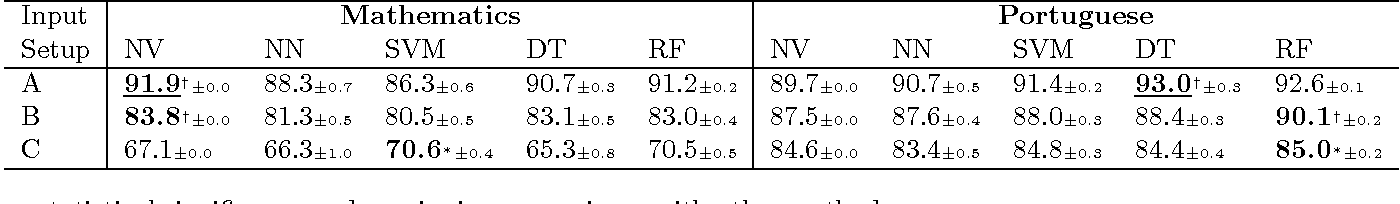

Additionally, we notice the significant improvement of Classification models over regression models. That makes sense it is much easier to predict whether or not a student passes and fails compared to predicting their exact grade. Taken a step further, we could likely classify students into "bins" of `A` `B` `C` `D` `F` with reasonable accuracy.

# References <a name="references"></a>


Cortez,Paulo. (2014). Student Performance. UCI Machine Learning Repository. https://doi.org/10.24432/C5TG7T.

Recursive feature elimination with cross-validation. scikit. (n.d.). https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html 

Johnson, M. K. and K. (2019, June 21). Feature engineering and selection: A practical approach for predictive models. Home. https://bookdown.org/max/FES/ 